# **Google Playstore App Analysis**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from afinn import Afinn

In [5]:
df = pd.read_csv('data/raw_data/googleplaystore.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.duplicated().sum()

483

In [9]:
df.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df.nunique() 

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [11]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
df[(df['Rating'] > 5.0) | (df['Rating'] < 0.0)] # looking for out of bounds values in the "Rating" column

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


 **Cleaning and preparing the dataset for analysis**

In [13]:
columns_to_drop = ['Genres', 'Current Ver', 'Android Ver']
df = df.drop(columns=columns_to_drop)
print(df.shape)
df.head()

(10841, 10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018"


**'App' column**

In [14]:
duplicated_apps = df[df.duplicated(subset="App", keep=False)]
duplicated_apps_sort=duplicated_apps.sort_values(by="App", ascending=True)

duplicated_apps_sort

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,"February 17, 2017"
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,"February 17, 2017"
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,"July 27, 2018"
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,"July 27, 2018"
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,"January 27, 2017"
...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,"August 2, 2018"
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,"August 2, 2018"
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,"August 2, 2018"
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,"10,000,000+",Free,0,Everyone,"August 6, 2018"


In [15]:
df = df.sort_values(by='Installs', ascending=False)
df = df.drop_duplicates(subset='App', keep='first')

**'Rating' column**

In [16]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Last Updated      0
dtype: int64

In [18]:
df[(df["Type"].isnull()) | (df["Content Rating"].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.000000,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19
9148,Command & Conquer: Rivals,FAMILY,4.175113,0,Varies with device,0,NaN,0,Everyone 10+,"June 28, 2018"


In [19]:
df = df.dropna()

**'Reviews' column**

In [20]:
df["Reviews"] = df["Reviews"].astype(int)
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Last Updated       object
dtype: object

**'Size' column**

In [21]:
def adjusting_values(value):

    if value == "Varies with device" :
        return float("nan")
    elif 'k' in value :
        return float(value.replace("k",""))/1024
    elif 'M' in value :
        return float(value.replace("M",""))
    return float(value)

df["Size"] = df["Size"].apply(adjusting_values)

In [22]:
size_median = df["Size"].median()
df["Size"] = df["Size"].fillna(size_median)

**'Installs' column**

In [23]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

**'Type' column**

In [24]:

df['Type'] = df['Type'].replace('Free', 0).replace('Paid', 1)
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type                int64
Price              object
Content Rating     object
Last Updated       object
dtype: object

**'Price' column**

In [25]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type                int64
Price             float64
Content Rating     object
Last Updated       object
dtype: object

**'Last Updated' column**

In [26]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

In [27]:
df.rename(columns = {'Last Updated' : 'Last_Updated', 'Content Rating' : 'Content_Rating'}, inplace=True)
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40.0,500000000,0,0.0,Teen,2018-08-02
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,12.0,500000000,0,0.0,Everyone,2018-07-26
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,12.0,500000000,0,0.0,Everyone 10+,2018-08-03


## **Analysis**

* TOP 3 APPS OVERALL (by number of Installs)

In [28]:
df=df.sort_index()

In [29]:
top3appinstalls = df.sort_values(by=["Installs","App"], ascending=False).head(3)
top3appinstalls[["App","Installs"]]

,App,Installs
3665,YouTube,1000000000
3904,WhatsApp Messenger,1000000000
3896,Subway Surfers,1000000000


* TOP 3 CATEGORIES (by number of Installs of the apps that belong to it)

In [30]:
dfcategories = df.groupby("Category")['Installs'].sum().reset_index()

In [31]:
dfcategoriesTop3 = dfcategories.sort_values(by='Installs', ascending=False).head(3)
dfcategoriesTop3

,Category,Installs
14,GAME,11698924415
6,COMMUNICATION,11038276251
29,TOOLS,8101771915


### Evaluate whether the categories change if we consider only `free` and `paid` `apps`

* Free Apps VS Paid Apps Categories

In [32]:
df_Free_apps = df[df['Type'] == 0]
df_Paid_apps = df[df['Type'] == 1]

In [33]:
df_Free_apps = df_Free_apps.groupby('Category')['Installs'].sum().reset_index()
df_Paid_apps = df_Paid_apps.groupby('Category')['Installs'].sum().reset_index()

In [34]:
dftop3categories_free = df_Free_apps.sort_values(by='Installs', ascending=False).head(3)
dftop3categories_free

,Category,Installs
14,GAME,11677924450
6,COMMUNICATION,11036916201
29,TOOLS,8100044474


In [35]:
dftop3categories_paid = df_Paid_apps.sort_values(by='Installs', ascending=False).head(3)
dftop3categories_paid

,Category,Installs
12,GAME,20999965
9,FAMILY,20650814
20,PERSONALIZATION,3258794


# Graphs

* #### Top 3 Apps by number of Installs

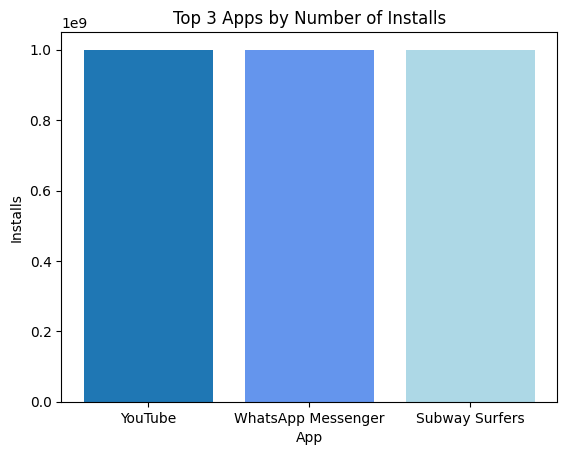

In [36]:
colors = ['#1f77b4', '#6495ED', '#ADD8E6']

plt.bar(top3appinstalls["App"], top3appinstalls["Installs"], color=colors)
plt.xlabel("App")
plt.ylabel("Installs")
plt.title("Top 3 Apps by Number of Installs")
plt.show()

* #### Top 3 Categories by number of Installs

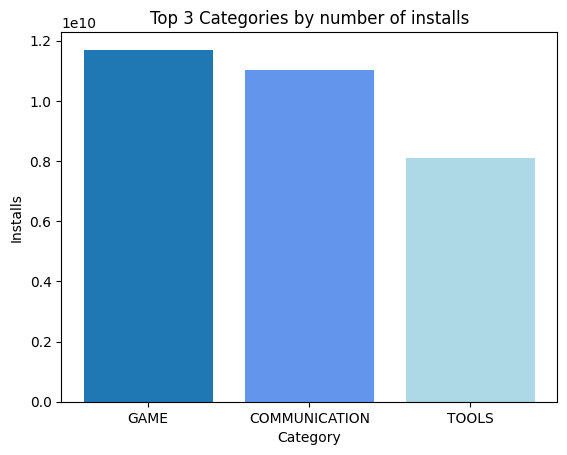

In [37]:
colors = ['#1f77b4', '#6495ED', '#ADD8E6'] 

plt.bar(dfcategoriesTop3["Category"], dfcategoriesTop3["Installs"], color=colors)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Top 3 Categories by number of installs")
plt.show()

## **Correlation**

* Study of correlation

In [38]:
df_correlation = df.select_dtypes(include=['number'])
df_correlation.head()

,Rating,Reviews,Size,Installs,Type,Price
0,4.1,159,19.0,10000,0,0.0
2,4.7,87510,8.7,5000000,0,0.0
3,4.5,215644,25.0,50000000,0,0.0
4,4.3,967,2.8,100000,0,0.0
5,4.4,167,5.6,50000,0,0.0


In [39]:
df_correlation.corr()

,Rating,Reviews,Size,Installs,Type,Price
Rating,1.000000,0.054982,0.048216,0.040055,0.041828,-0.019442
Reviews,0.054982,1.000000,0.066204,0.625066,-0.033054,-0.007590
Size,0.048216,0.066204,1.000000,0.030439,-0.013396,-0.019483
Installs,0.040055,0.625066,0.030439,1.000000,-0.041782,-0.009409
Type,0.041828,-0.033054,-0.013396,-0.041782,1.000000,0.223773
Price,-0.019442,-0.007590,-0.019483,-0.009409,0.223773,1.000000


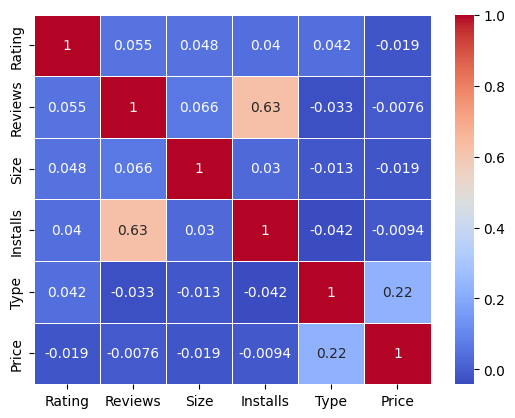

In [40]:
sns.heatmap(df_correlation.corr(), annot = True, linewidths=0.5, cmap='coolwarm')
plt.show()

## **Distributions**

* Study of distributions

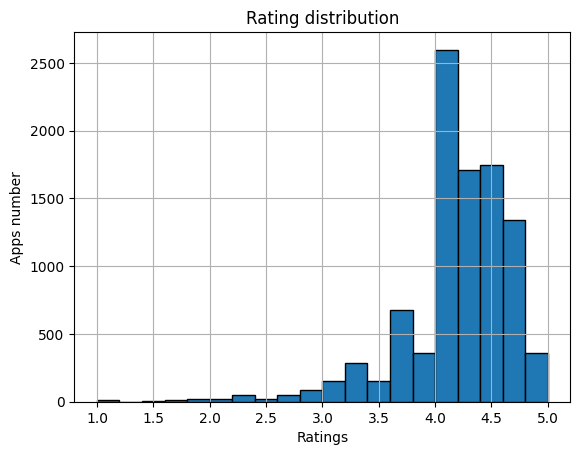

In [41]:
plt.hist(df['Rating'], bins=20, edgecolor="k")
plt.xlabel('Ratings')
plt.ylabel('Apps number')
plt.title('Rating distribution')
plt.grid()

plt.show()

In [42]:
intervals = [0,5000,50000,150000, 300000, 1000000, 5000000, df["Reviews"].max()]
labels = ["0-5K", "5K-50K", "50K-150K", "150K-300K", "300K-1M", "1M-5M", "5M+"]
df2 = df.copy()
df2["Labeled_Rev"] = pd.cut(df2["Reviews"], bins= intervals, labels=labels)
count_reviews = df2["Labeled_Rev"].value_counts()
count_reviews

Labeled_Rev
0-5K         5322
5K-50K       1799
50K-150K      750
300K-1M       452
150K-300K     393
1M-5M         268
5M+            82
Name: count, dtype: int64

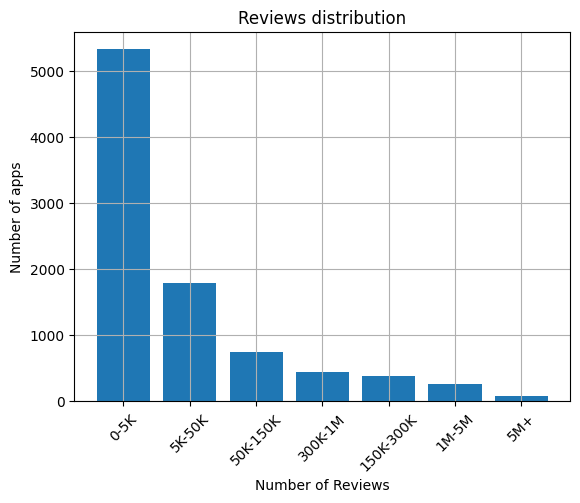

In [43]:
plt.bar(count_reviews.index, count_reviews.values)
plt.xlabel("Number of Reviews")
plt.ylabel("Number of apps")
plt.title("Reviews distribution")
plt.xticks(rotation=45)
plt.grid()

plt.show()

In [44]:
intervalsPrice = [-1, 0.01, 1, 10, 25, 100, max(df.Price)]
labelsPrice = ['FreeApp', 'FreeApp-1', '1-10','10-25', '25-100', '100+']
df3 = df.copy()
df3['Labeled_Price'] = pd.cut(df3['Price'], bins=intervalsPrice, labels=labelsPrice)
count_apps = df3['Labeled_Price'].value_counts(sort=False)

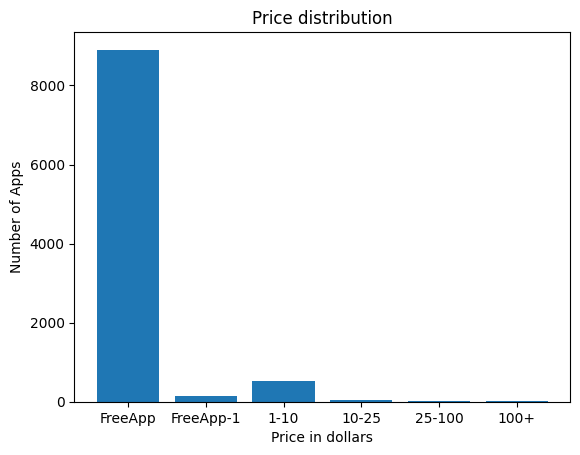

In [45]:
plt.bar(count_apps.index, count_apps.values)
plt.xlabel('Price in dollars')
plt.ylabel('Number of Apps')
plt.title('Price distribution')

plt.show()

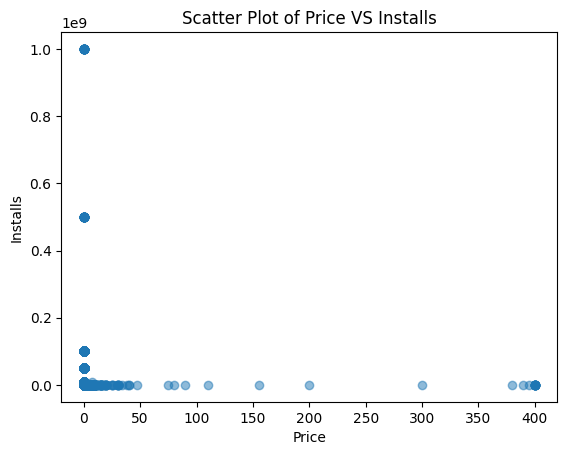

In [46]:
plt.scatter(df.Price, df.Installs, alpha=0.5)
plt.title('Scatter Plot of Price VS Installs')
plt.xlabel('Price')
plt.ylabel('Installs')

plt.show()

## **CATEGORIES**

In [47]:
dftop10categories  = dfcategories.sort_values(by='Installs', ascending=False).head(10).reset_index(drop=True)
dftop10categories

,Category,Installs
0,GAME,11698924415
1,COMMUNICATION,11038276251
2,TOOLS,8101771915
3,FAMILY,7806542505
4,PRODUCTIVITY,5788091369
5,SOCIAL,5487867902
6,PHOTOGRAPHY,4658147655
7,VIDEO_PLAYERS,3921902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


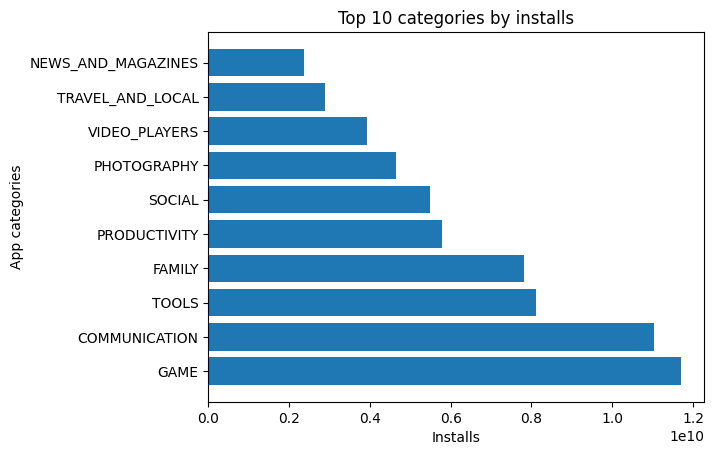

In [48]:
plt.barh(dftop10categories["Category"],dftop10categories["Installs"])

plt.xlabel("Installs")
plt.ylabel("App categories")
plt.title("Top 10 categories by installs")
plt.show()

* Printing the table and plotting the top 5 apps with the smallest size and the most downloads.

In [49]:
dfTop5SmallerSizeGreaterInstalls = df.sort_values(by=['Size', 'Installs'], ascending=[True, False]).head()
dfTop5SmallerSizeGreaterInstalls[['App', 'Size', 'Installs']]

,App,Size,Installs
1532,Essential Resources,0.008301,50000
1553,Market Update Helper,0.010742,1000000
4983,My baby firework (Remove ad),0.013672,1000
10072,ExDialer PRO Key,0.016602,100000
4977,Ad Remove Plugin for App2SD,0.016602,1000


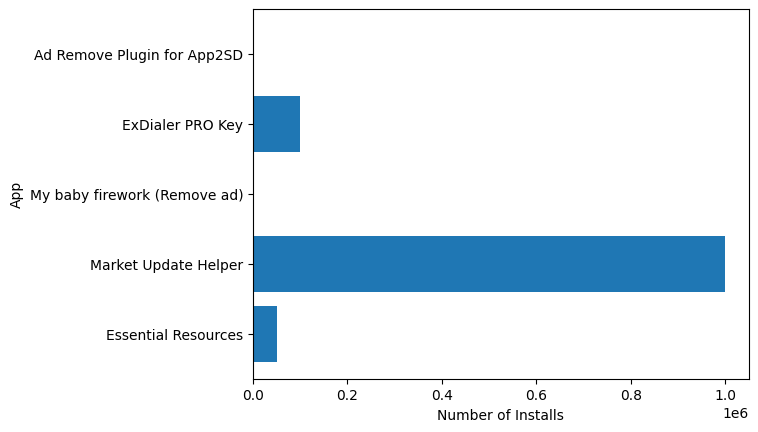

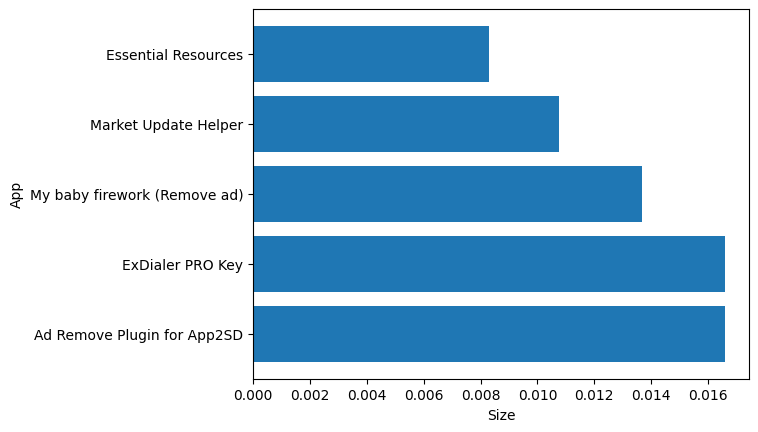

In [50]:
plt.barh(dfTop5SmallerSizeGreaterInstalls['App'], dfTop5SmallerSizeGreaterInstalls['Installs'])
plt.xlabel("Number of Installs")
plt.ylabel("App")

plt.show()

plt.barh(dfTop5SmallerSizeGreaterInstalls['App'], dfTop5SmallerSizeGreaterInstalls['Size'])
plt.gca().invert_yaxis() 
plt.xlabel("Size")
plt.ylabel("App")

plt.show()

* Printing the table and plotting the top 3 download apps in each category, free and paid (if any).

In [51]:
Top5PerCategory = df.groupby('Category', group_keys=False).apply(lambda x: x.nlargest(5, 'Installs'))
Top5PerCategory.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,Teen,2018-06-08
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20.0,10000000,0,0.0,Teen,2018-04-02
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31.0,10000000,0,0.0,Everyone,2018-07-30


* Plotting in a bar graph for the categories with the total number of installs in each category.

In [52]:
dfcategories.sort_values(by='Installs', inplace=True)
dfcategories.head(3)

,Category,Installs
10,EVENTS,15973161
2,BEAUTY,27197050
22,PARENTING,31521110


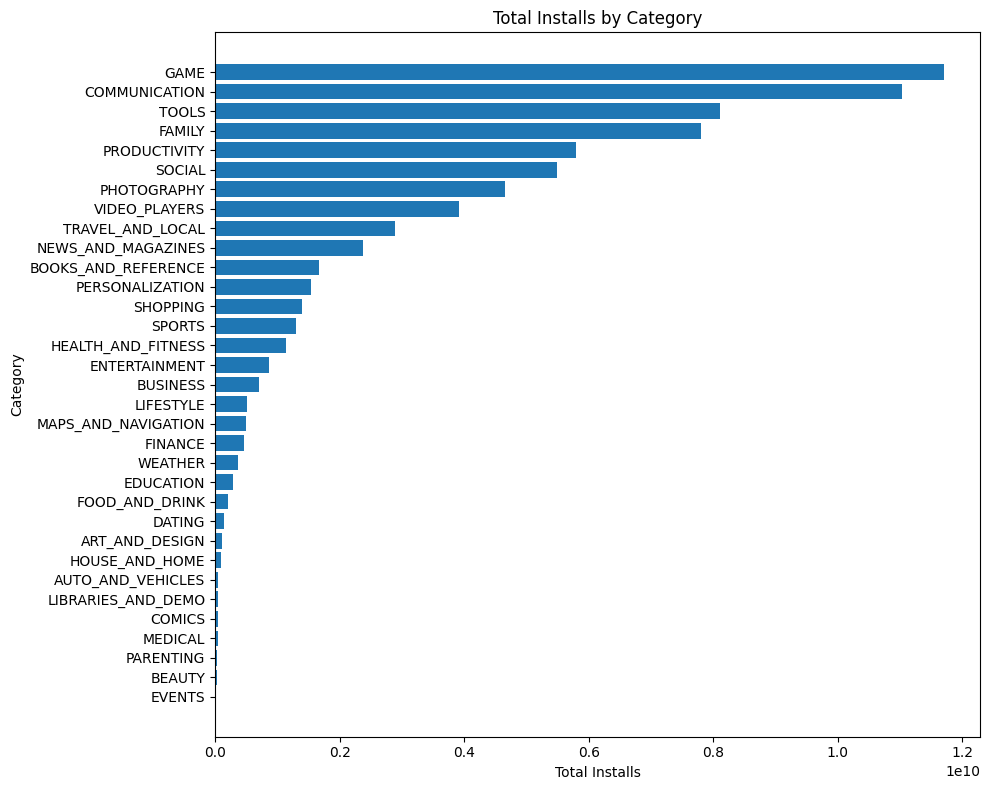

In [53]:
plt.figure(figsize=(10, 8))
plt.barh(dfcategories['Category'], dfcategories['Installs'])
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.title('Total Installs by Category')
plt.tight_layout()

plt.show()

* Representing the total spending for paid apps in each category in a bar graph (the sum of all prices in the same category) gives us a picture of the store's price division, which are the categories where you can spend the most , i.e. those with higher prices or a greater number of paid apps.

In [54]:
dfTotalPricePerCategory = df.groupby('Category')['Price'].sum().reset_index().sort_values(by='Price', ascending=False)
dfTotalPricePerCategory.head(3)

,Category,Price
12,FINANCE,2900.83
11,FAMILY,2405.85
18,LIFESTYLE,2360.87


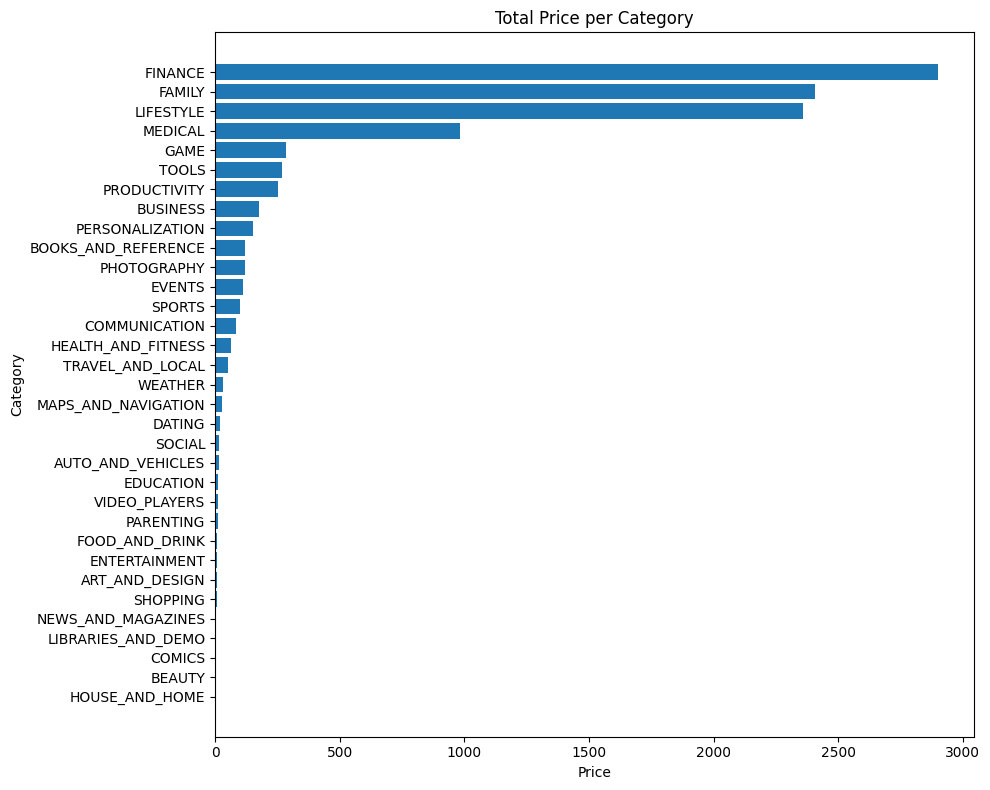

In [55]:
plt.figure(figsize=(10, 8))
plt.barh(dfTotalPricePerCategory['Category'], dfTotalPricePerCategory['Price'])
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Total Price per Category')
plt.gca().invert_yaxis() # For changing the sorting visualization
plt.tight_layout()

plt.show()

* Plotting the total profit of each category in a bar graph by multiplying the price by the number of installs of each app in that category (paid apps only). Let's see how the end user spends his money.

In [56]:
df_Paid_apps_Extended = df.copy()
df_Paid_apps_Extended =  df_Paid_apps_Extended[df['Price'] > 0] # Keeping only Paid apps
df_Paid_apps_Extended.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,1,4.99,Everyone,2018-03-25
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,1,4.99,Everyone,2017-04-11
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,12.0,100000,1,3.99,Everyone,2018-07-05


In [57]:
df_Paid_apps_Extended['App_Total_Profit'] = df_Paid_apps_Extended['Price'] * df_Paid_apps_Extended['Installs']
df_Paid_apps_Extended.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated,App_Total_Profit
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,1,4.99,Everyone,2018-03-25,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,1,4.99,Everyone,2017-04-11,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,12.0,100000,1,3.99,Everyone,2018-07-05,399000.0


In [58]:
dfTotalProfitInCategory = df_Paid_apps_Extended.groupby('Category')['App_Total_Profit'].sum().reset_index().rename(columns={'App_Total_Profit' : 'Total_Profit'})
dfTotalProfitInCategory.head(3)

,Category,Total_Profit
0,ART_AND_DESIGN,31840.00
1,AUTO_AND_VEHICLES,100148.50
2,BOOKS_AND_REFERENCE,90226.74


In [59]:
dfTotalProfitInCategorySorted = dfTotalProfitInCategory.sort_values(by='Total_Profit')
dfTotalProfitInCategorySorted.head(3)

,Category,Total_Profit
14,LIBRARIES_AND_DEMO,99.00
8,EVENTS,109.99
24,SOCIAL,5940.00


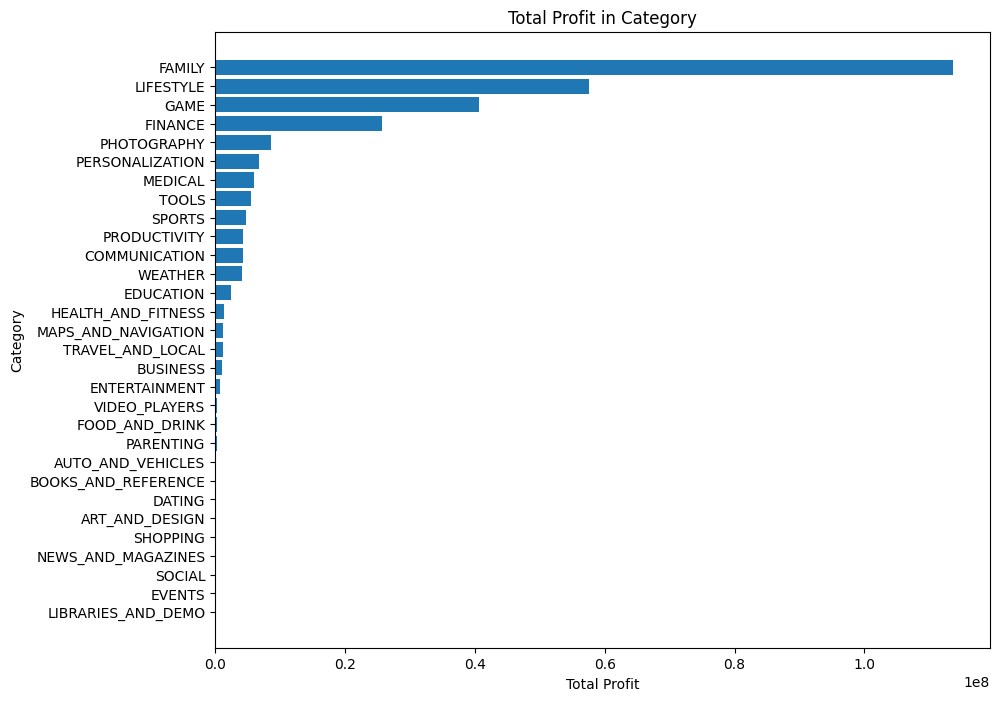

In [60]:
plt.figure(figsize=(10, 8))
plt.barh(dfTotalProfitInCategorySorted['Category'], dfTotalProfitInCategorySorted['Total_Profit'])
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.title('Total Profit in Category')
# plt.gca().invert_yaxis() # For changing the sorting visualization

plt.show()

# **Google Playstore User Reviews Analysis**

In [61]:
user_rev = pd.read_csv("data/raw_data/googleplaystore_user_reviews.csv")

In [62]:
user_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


* Data exploration and cleaning of the "googleplaystore_user_reviews.csv" file

In [63]:
user_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [64]:
user_rev.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [65]:
user_rev.isna().sum().sum()

107457

In [66]:
user_rev['App'].nunique() 

1074

In [67]:
user_rev.drop_duplicates(inplace=True)
user_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [68]:
user_rev.isna().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [69]:
user_rev.isna().sum().sum() 

3933

In [70]:
user_rev2 = user_rev.dropna(subset='Translated_Review')
user_rev2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [71]:
user_rev2.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

* Comparing the cleaning and normalization results of the review datasets

In [72]:
user_rev2.groupby('App')['Translated_Review'].count().sort_values(ascending=False).to_frame().rename(columns={'Translated_Review' : 'Reviews_Count'}).reset_index()

,App,Reviews_Count
0,Facebook,130
1,Episode - Choose Your Story,124
2,Angry Birds Classic,107
3,Family Locator - GPS Tracker,105
4,Google Photos,101
...,...,...
860,Caller ID +,1
861,Free Live Talk-Video Call,1
862,CBS News,1
863,Calendar+ Schedule Planner App,1


In [73]:
df = pd.read_csv("data/raw_data/gp_clean.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated
0,Temple Run 2,GAME,4.300000,8118609,62.0,500000000,0,0.00,Everyone,2018-07-05
1,Google Duo - High Quality Video Calls,COMMUNICATION,4.600000,2083237,4.3,500000000,0,0.00,Everyone,2018-07-31
2,Viber Messenger,COMMUNICATION,4.300000,11334973,4.3,500000000,0,0.00,Everyone,2018-07-18
3,Google Calendar,PRODUCTIVITY,4.200000,858230,4.3,500000000,0,0.00,Everyone,2018-08-06
4,Dropbox,PRODUCTIVITY,4.400000,1860844,61.0,500000000,0,0.00,Everyone,2018-08-01
...,...,...,...,...,...,...,...,...,...,...
9653,Test Application DT 02,ART_AND_DESIGN,4.193338,0,1.2,0,0,0.00,Everyone,2017-03-14
9654,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.193338,0,56.0,0,1,3.99,Everyone,2017-01-22
9655,Pekalongan CJ,SOCIAL,4.193338,0,5.9,0,0,0.00,Teen,2018-07-21
9656,CX Network,BUSINESS,4.193338,0,10.0,0,0,0.00,Everyone,2018-08-06


In [75]:
df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False)

,App,Reviews
7260,Facebook,78158306
7255,WhatsApp Messenger,69119316
7261,Instagram,66577313
7254,Messenger – Text and Video Chat for Free,56642847
2986,Clash of Clans,44881447
...,...,...
6115,"Period Tracker, Pregnancy Calculator & Calendar 🌸",0
5862,DW,0
4900,FE Connect Fhoton,0
4885,FE Connect Drive-Tech,0


In [76]:
gp_reviews = df[['App', 'Reviews']]
user_rev_reviews = user_rev2.groupby('App').count()

In [77]:
gp_reviews

,App,Reviews
0,Temple Run 2,8118609
1,Google Duo - High Quality Video Calls,2083237
2,Viber Messenger,11334973
3,Google Calendar,858230
4,Dropbox,1860844
...,...,...
9653,Test Application DT 02,0
9654,EG | Explore Folegandros,0
9655,Pekalongan CJ,0
9656,CX Network,0


In [78]:
user_rev_reviews = user_rev_reviews.reset_index()[['App', 'Translated_Review']].rename(columns={'Translated_Review' : 'Reviews'})
user_rev_reviews

,App,Reviews
0,10 Best Foods for You,95
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,36
2,11st,39
3,1800 Contacts - Lens Store,40
4,1LINE – One Line with One Touch,38
...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,39
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,32
862,Hotstar,32
863,Hotwire Hotel & Car Rental App,33


In [79]:
reviews_comparison = gp_reviews.merge(user_rev_reviews, on='App', how='inner')
reviews_comparison

,App,Reviews_x,Reviews_y
0,Google Duo - High Quality Video Calls,2083237,18
1,Dropbox,1860844,38
2,Flipboard: News For Our Time,1284017,13
3,Gboard - the Google Keyboard,1855262,38
4,Candy Crush Saga,22429716,40
...,...,...,...
811,Family Dollar,2588,34
812,CheckPoints 🏆 Rewards App,23187,40
813,"Ebates: Cash Back, Coupons, Rewards & Savings",37253,38
814,FidMe Loyalty Cards & Deals at Grocery Superma...,33758,11


In [80]:
reviews_comparison = reviews_comparison.rename(columns={'Reviews_x': 'Reviews_googleplaystore.csv', 'Reviews_y': 'Reviews_googleplaystore_user_reviews.csv'})
reviews_comparison

,App,Reviews_googleplaystore.csv,Reviews_googleplaystore_user_reviews.csv
0,Google Duo - High Quality Video Calls,2083237,18
1,Dropbox,1860844,38
2,Flipboard: News For Our Time,1284017,13
3,Gboard - the Google Keyboard,1855262,38
4,Candy Crush Saga,22429716,40
...,...,...,...
811,Family Dollar,2588,34
812,CheckPoints 🏆 Rewards App,23187,40
813,"Ebates: Cash Back, Coupons, Rewards & Savings",37253,38
814,FidMe Loyalty Cards & Deals at Grocery Superma...,33758,11


`The number of reviews for the googleplaystore.csv file is much higher than the googleplaystore_user_reviews.csv one.    
Maybe this is related to the fact that the googleplaystore_user_reviews.csv is a sample from googleplaystore.csv used to perform a sentiment analysis.`

* Using the python library 'afinn' and 'np files', we're going to perform sentiment analysis on application reviews

In [81]:
positive_words = pd.read_excel("data/raw_data/p.xlsx", header=None)
negative_words = pd.read_excel("data/raw_data/n.xlsx", header=None)
positive_words.rename({0: 'Positive_Words'}, axis=1, inplace=True)
negative_words.rename({0: 'Negative_Words'}, axis=1, inplace=True)

In [82]:
positive_words

,Positive_Words
0,abound
1,abounds
2,abundance
3,abundant
4,accessable
...,...
2000,youthful
2001,zeal
2002,zenith
2003,zest


In [83]:
positive_words_score = {word : 2 for word in positive_words.Positive_Words} # dictionary comprehension

In [84]:
negative_words

,Negative_Words
0,faced
1,faces
2,abnormal
3,abolish
4,abominable
...,...
4778,zaps
4779,zealot
4780,zealous
4781,zealously


In [85]:
negative_words_score = {word : -2 for word in negative_words.Negative_Words}

In [86]:
afn = Afinn()

In [87]:
# Adding the positive and negative words with the chosen values(2, -2) to the Afinn object
for word, score in positive_words_score.items():
    afn._dict[word] = score

for word, score in negative_words_score.items():
    afn._dict[word] = score

In [88]:
user_rev3 = user_rev2.copy()
user_rev3['Afinn_Score'] = [afn.score(review) for review in user_rev2['Translated_Review']]
user_rev3

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Afinn_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,10.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,4.0
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,2.0
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,2.0
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000,2.0
...,...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,-3.0
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,6.0
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,-4.0
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,4.0


In [89]:
user_rev3['Afinn_Sentiment'] = ['positive' if score > 0
                                            else 'negative' if score < 0
                                                else 'neutral'
                                                    for score in user_rev3.Afinn_Score]

user_rev3

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Afinn_Score,Afinn_Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,10.0,positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,4.0,positive
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,2.0,positive
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,2.0,positive
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000,2.0,positive
...,...,...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,-3.0,negative
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,6.0,positive
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,-4.0,negative
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,4.0,positive


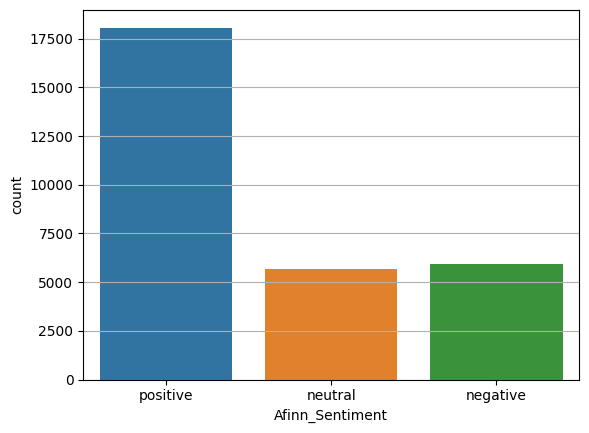

In [90]:
sns.countplot(data=user_rev3, x='Afinn_Sentiment')
plt.grid(axis='y')
plt.show() # the majority of the 'Afinn_Sentiment' is positive

* ONLY FOR PAID APPS: find the 5 apps with the highest sentiment and the 5 apps with the lowest sentiment (for each of these we record: name and category)

In [91]:
gp = pd.read_csv("data/raw_data/gp_clean.csv")

In [92]:
merged_df = gp.merge(user_rev3, on='App', how='inner')
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Afinn_Score,Afinn_Sentiment
0,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,4.3,500000000,0,0.00,Everyone,2018-07-31,Duo really good like FaceTime since I can't Fa...,Positive,0.600000,0.431250,17.0,positive
1,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,4.3,500000000,0,0.00,Everyone,2018-07-31,Best quality video app. I used WhatsApp video ...,Positive,0.500000,0.150000,4.0,positive
2,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,4.3,500000000,0,0.00,Everyone,2018-07-31,"I used 9 months NO problems, UNTIL updated. On...",Neutral,0.000000,0.000000,-2.0,negative
3,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,4.3,500000000,0,0.00,Everyone,2018-07-31,The simplicity beautiful. It easy use. The wor...,Positive,0.237833,0.694667,9.0,positive
4,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,4.3,500000000,0,0.00,Everyone,2018-07-31,Plz note points 1. Make like run slow networks...,Negative,-0.300000,0.400000,4.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28245,Diabetes & Diet Tracker,MEDICAL,4.6,395,19.0,1000,1,9.99,Everyone,2018-07-16,Tracks everything I need wraps nice neat packa...,Positive,0.600000,1.000000,5.0,positive
28246,Diabetes & Diet Tracker,MEDICAL,4.6,395,19.0,1000,1,9.99,Everyone,2018-07-16,"Generally easy use. As apps, things get used t...",Positive,0.377778,0.477778,4.0,positive
28247,Diabetes & Diet Tracker,MEDICAL,4.6,395,19.0,1000,1,9.99,Everyone,2018-07-16,Extremely helpful diabetic! Woke intake really,Positive,0.021875,0.600000,2.0,positive
28248,Diabetes & Diet Tracker,MEDICAL,4.6,395,19.0,1000,1,9.99,Everyone,2018-07-16,"Been looking log food intake, medications, exe...",Positive,0.322222,0.638889,4.0,positive


In [93]:
Paid_Apps = merged_df[merged_df['Type'] == 1]
Paid_Apps_Afinn_Sentiment_Sorted = Paid_Apps.sort_values(by="Afinn_Score", ascending=False)[['App', 'Category', 'Type', 'Afinn_Score']].reset_index(drop=True)
Paid_Apps_Afinn_Sentiment_Sorted

,App,Category,Type,Afinn_Score
0,Dr. Panda & Toto's Treehouse,FAMILY,1,28.0
1,Essential Anatomy 3,MEDICAL,1,18.0
2,Beautiful Widgets Pro,PERSONALIZATION,1,18.0
3,HD Widgets,PERSONALIZATION,1,16.0
4,Golfshot Plus: Golf GPS,SPORTS,1,15.0
...,...,...,...,...
298,Beautiful Widgets Pro,PERSONALIZATION,1,-4.0
299,Dr. Panda & Toto's Treehouse,FAMILY,1,-4.0
300,HD Widgets,PERSONALIZATION,1,-6.0
301,Beautiful Widgets Pro,PERSONALIZATION,1,-6.0


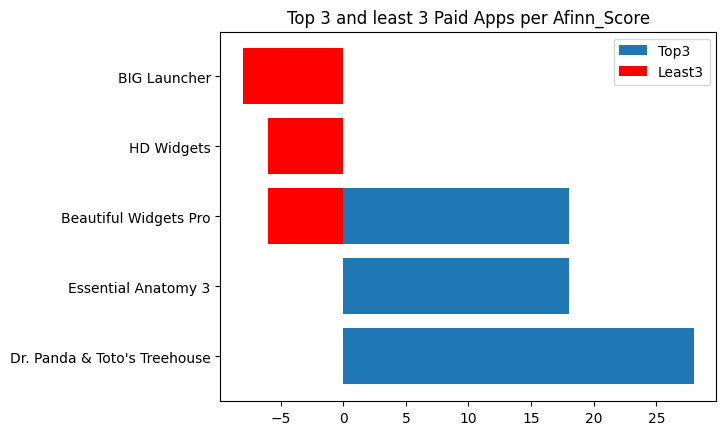

In [94]:
plt.barh(Paid_Apps_Afinn_Sentiment_Sorted.App.head(3), Paid_Apps_Afinn_Sentiment_Sorted.Afinn_Score.head(3), label='Top3')
plt.barh(Paid_Apps_Afinn_Sentiment_Sorted.App.tail(3), Paid_Apps_Afinn_Sentiment_Sorted.Afinn_Score.tail(3), color='red', label='Least3')
plt.legend()
plt.title("Top 3 and least 3 Paid Apps per Afinn_Score")

plt.show()

* Best category in terms of sentiment.

In [95]:
user_rev4 = user_rev3.groupby('App').agg({col: 'mean' for col in user_rev3.columns if pd.api.types.is_numeric_dtype(user_rev3[col])}).reset_index()
user_rev4 # this new user_rev dataframe contains the average values for [Sentiment_Polarity, Sentiment_Subjectivity, Afinn_Score]

,App,Sentiment_Polarity,Sentiment_Subjectivity,Afinn_Score
0,10 Best Foods for You,0.465906,0.493254,2.884211
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.358227,0.508907,2.194444
2,11st,0.185943,0.455340,0.230769
3,1800 Contacts - Lens Store,0.318145,0.591098,3.075000
4,1LINE – One Line with One Touch,0.196290,0.557315,1.210526
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.098559,0.525508,0.692308
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.223750,0.380365,0.843750
862,Hotstar,0.038178,0.493964,-0.500000
863,Hotwire Hotel & Car Rental App,0.187029,0.459717,0.454545


In [96]:
merged_df2 = gp.merge(user_rev4, on='App', how='inner')
merged_df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated,Sentiment_Polarity,Sentiment_Subjectivity,Afinn_Score
0,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,4.3,500000000,0,0.00,Everyone,2018-07-31,0.285690,0.497991,5.388889
1,Dropbox,PRODUCTIVITY,4.4,1860844,61.0,500000000,0,0.00,Everyone,2018-08-01,0.236331,0.443636,1.078947
2,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,4.3,500000000,0,0.00,Everyone 10+,2018-08-03,0.385865,0.433822,1.307692
3,Gboard - the Google Keyboard,TOOLS,4.2,1855262,4.3,500000000,0,0.00,Everyone,2018-07-31,0.064587,0.517172,1.473684
4,Candy Crush Saga,GAME,4.4,22429716,74.0,500000000,0,0.00,Everyone,2018-07-05,0.031068,0.456293,1.975000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Family Dollar,SHOPPING,4.3,2588,21.0,1000000,0,0.00,Everyone,2018-07-23,0.240759,0.441536,0.823529
812,CheckPoints 🏆 Rewards App,SHOPPING,4.1,23187,25.0,1000000,0,0.00,Everyone,2018-06-21,0.276380,0.518423,2.450000
813,"Ebates: Cash Back, Coupons, Rewards & Savings",SHOPPING,4.5,37253,31.0,1000000,0,0.00,Everyone,2018-08-03,0.225387,0.415520,2.052632
814,FidMe Loyalty Cards & Deals at Grocery Superma...,SHOPPING,4.2,33758,4.3,1000000,0,0.00,Everyone,2018-08-06,0.220268,0.414168,2.090909


In [97]:
average_score_category = merged_df2.groupby('Category')['Afinn_Score'] \
                                .mean() \
                                    .sort_values(ascending=False) \
                                        .to_frame() \
                                            .rename({'Afinn_Score' : 'Afinn_Score_Mean'}, axis=1)
average_score_category .head()

,Afinn_Score_Mean
Category,
PARENTING,3.179853
HEALTH_AND_FITNESS,2.867715
ART_AND_DESIGN,2.772768
PRODUCTIVITY,2.662044
AUTO_AND_VEHICLES,2.530748


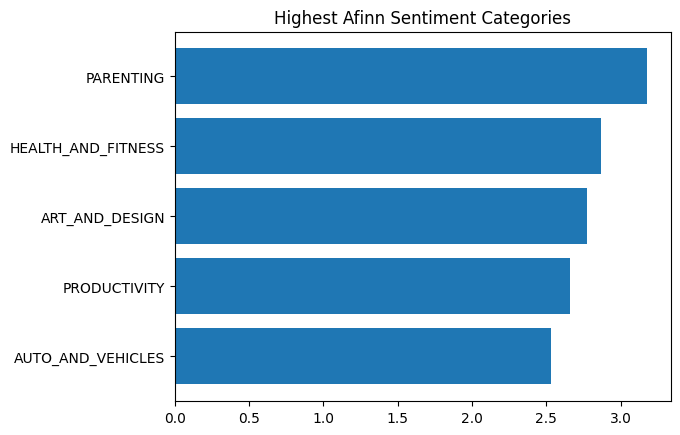

In [98]:
# plt.figure(figsize=(12, 9))
plt.barh(average_score_category.head()[::-1].index, average_score_category.Afinn_Score_Mean.head()[::-1])
plt.title("Highest afinn sentiment categories".title())
# plt.tight_layout()
plt.show()
# average Afinn sentiment for each "Category"(top 5)

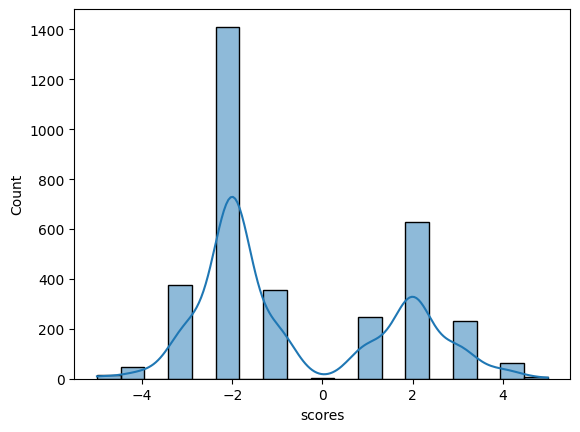

In [99]:
# here we study the afinn library words distribution to motivate the values we've chosen for positive and negative words
afinn2 = Afinn(language="en")
Afinn_dict = {}
for x, y in afinn2._dict.items() :
    Afinn_dict = {"words" : [x for x in afinn2._dict.keys()], 
                  "scores": [y for y in afinn2._dict.values()]}
 

Afinn_df = pd.DataFrame(Afinn_dict) 
sns.histplot(Afinn_df["scores"], kde=True)
plt.show()